In [1]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import datetime
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("data.csv",dtype={'Symbol': np.str},parse_dates=['Accper'])

`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [3]:
data

,Stkcd,Accper,Current_Ratio,Liquidity_Ratio,Cash_Ratio,Cash_Flow_Interest_Coverage_Ratio,Asset-liability_Ratio,Equity_Ratio,Total_Assets_Growth_Rate,Net_Profit_Growth_Rate,...,Operational_Index,Return_On_Assets,Return_On_Net_Assets,EBIT,Operating_Profit_Margin,Cost_Profit_Margin,Cash-To-Profit_Ratio,Return_On_Investment,EPS,Future_EPS
0,SP500,2016-03-31,NaN,NaN,NaN,NaN,0.930042,13.294233,0.163304,0.081187,...,11.265539,0.003095,0.034870,8.029000e+09,0.301618,NaN,7.381741,0.002443,0.424278,NaN
1,SP500,2016-06-30,NaN,NaN,NaN,NaN,0.931560,13.611283,0.089661,0.061027,...,-3.962048,0.006087,0.069604,1.615400e+10,0.306461,NaN,-2.055095,0.004741,0.716016,NaN
2,SP500,2016-09-30,NaN,NaN,NaN,NaN,0.928982,13.080947,0.073941,0.055186,...,-9.483011,0.009271,0.104073,2.456000e+10,0.311390,NaN,-6.227280,0.008040,1.089342,NaN
3,AAPL,2016-03-31,1.291051,0.387376,0.109543,-44.356706,0.789403,3.748416,0.252446,0.376418,...,-13.014385,0.003038,0.009088,1.929084e+09,0.112694,0.139687,-6.357096,0.009832,0.109533,NaN
4,AAPL,2016-06-30,1.245219,0.406726,0.139070,60.397403,0.806019,4.155141,0.326610,0.044944,...,3.631853,0.015726,0.051694,1.040747e+10,0.132423,0.166989,2.584802,0.030460,0.635818,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80214,STRP,2020-09-30,3.279370,3.279370,0.538087,2.232341,0.514825,1.061111,0.000138,0.039218,...,7.286979,0.039270,0.034670,3.996302e+07,0.215353,0.255361,2.726799,0.031628,0.045780,NaN
80215,STRP,2020-12-31,2.991174,2.991174,0.189276,1.853899,0.505506,1.022270,-0.008993,-0.137421,...,1.221283,0.052614,0.044811,5.330533e+07,0.223599,0.261335,2.409628,0.045190,0.059906,NaN
80216,STRP,2021-03-31,3.115942,3.115942,0.292632,-0.220122,0.502220,1.008921,0.016049,2.879847,...,NaN,0.014636,0.016635,1.483519e+07,0.300002,0.397978,-0.170217,0.014391,NaN,NaN
80217,STRP,2021-06-30,3.743460,3.743460,0.034283,-0.057328,0.491683,0.967277,-0.003038,0.343907,...,NaN,0.028909,0.029463,2.918387e+07,0.276184,0.364456,-0.050729,0.024851,NaN,NaN


In [4]:
data.columns

Index(['Stkcd', 'Accper', 'Current_Ratio', 'Liquidity_Ratio', 'Cash_Ratio',
       'Cash_Flow_Interest_Coverage_Ratio', 'Asset-liability_Ratio',
       'Equity_Ratio', 'Total_Assets_Growth_Rate', 'Net_Profit_Growth_Rate',
       'Comprehensive_Income_Growth_Rate', 'Sustainable_Growth_Rate',
       'Owner_s_Equity_Growth_Rate', 'Financial_Leverage',
       'Operating_Leverage', 'Accounts_Receivable_Turnover_Ratio',
       'Inventory_Turnover_Ratio', 'Working_Capital_Turnover_Ratio',
       'Cash_and_Cash_Equivalents_Turnover_Ratio',
       'Current_Assets_Turnover_Ratio', 'Fixed_Assets_Turnover_Ratio',
       'Total_Asset_Turnover_Ratio', 'Operating_Profit_Net_Cash_Content',
       'Total_Cash_Recovery', 'Operational_Index', 'Return_On_Assets',
       'Return_On_Net_Assets', 'EBIT', 'Operating_Profit_Margin',
       'Cost_Profit_Margin', 'Cash-To-Profit_Ratio', 'Return_On_Investment',
       'EPS', 'Future_EPS'],
      dtype='object')

In [5]:
from dateutil.relativedelta import relativedelta
import datetime

In [6]:
# #测试时间函数
# today=data.Accper[1]
# np.datetime64(nextdate(today)) in data['Accper'].values

In [7]:
#通过今天返回今天的下个季度的最后一天
def nextdate(today):
    today=today+datetime.timedelta(days=10)
    next_date=datetime.date(today.year,today.month-(today.month-1)%3+2,1)+relativedelta(months=1,days=-1)
    return next_date

In [8]:
##元组怎么用
# def update_eps(x):
#   print('len=',len(x['Accper']))
#   for row in x.iterrows():
#     if (np.datetime64(nextdate(row[1])) in x['Accper'].values):
#       future_eps=x[x['Accper'] == np.datetime64(nextdate(row[1]))].iloc[:,-2]
#       row[-1]=future_eps
      

In [9]:
def update_eps(x):
  global dataout
  x=x.reset_index(drop=True)
  for i in range(len(x['Accper'])):
    if (np.datetime64(nextdate(x.Accper[i])) in x['Accper'].values):
      future_eps=x[x['Accper'] == np.datetime64(nextdate(x.Accper[i]))].iloc[:,-2]
      x.iloc[i,-1]=future_eps
  dataout.append(x)

In [10]:
dataout=[]#是个list
data.groupby('Stkcd',group_keys=False).apply(update_eps)

""


In [11]:
data3=pd.concat(dataout)
data3=data3.dropna()
data3=data3.drop(columns=['EPS'])

In [12]:
data3=data3.reset_index(drop=True)
data3


,Stkcd,Accper,Current_Ratio,Liquidity_Ratio,Cash_Ratio,Cash_Flow_Interest_Coverage_Ratio,Asset-liability_Ratio,Equity_Ratio,Total_Assets_Growth_Rate,Net_Profit_Growth_Rate,...,Total_Cash_Recovery,Operational_Index,Return_On_Assets,Return_On_Net_Assets,EBIT,Operating_Profit_Margin,Cost_Profit_Margin,Cash-To-Profit_Ratio,Return_On_Investment,Future_EPS
0,0055.HK,2019-03-31,1.042785,0.577486,0.163058,19.986092,0.270758,0.371286,-0.005702,0.100264,...,0.013945,1.004190,0.021926,0.020527,1.380945e+08,0.071808,0.079216,0.656901,0.004662,0.092089
1,0055.HK,2019-09-30,1.028640,0.607188,0.197985,365.451594,0.269749,0.369392,0.019587,0.243492,...,0.087101,2.883482,0.055420,0.053246,3.517456e+08,0.069937,0.085160,1.590517,0.014966,0.156581
2,0055.HK,2019-12-31,1.018991,0.630694,0.171091,204.414341,0.278266,0.385551,0.047187,0.379693,...,0.109908,1.407305,0.073880,0.072159,4.763158e+08,0.071424,0.085806,1.533349,0.020098,0.007666
3,0055.HK,2020-03-31,1.035491,0.623834,0.177662,-68.529810,0.269218,0.368398,0.039166,-0.762738,...,-0.032341,-28.797704,0.005578,0.004640,3.665077e+07,0.051783,0.074622,-6.306631,0.012596,0.044704
4,0055.HK,2020-06-30,1.022618,0.584835,0.154379,6.187099,0.257824,0.347390,0.026595,-0.402941,...,0.005526,0.181759,0.022913,0.023732,1.482274e+08,0.104064,0.151667,0.245828,0.019409,0.074484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,ZZ-B.ST,2017-12-31,1.252963,0.967910,0.217087,-6.218580,0.636977,1.754648,0.391041,-0.524148,...,-0.044966,-5.846178,0.024385,0.026696,1.318273e+08,0.041494,0.048548,-3.275803,0.156993,0.019583
26133,ZZ-B.ST,2018-06-30,1.369232,0.936780,0.326114,2.875350,0.577800,1.368543,0.333473,0.312685,...,0.015172,0.762842,0.031812,0.054694,2.142928e+08,0.164012,0.206903,0.617738,0.042299,0.340842
26134,ZZ-B.ST,2018-09-30,1.425613,0.955237,0.354545,-0.779157,0.590018,1.439129,0.393759,0.371169,...,-0.006480,-0.243447,0.045464,0.076671,3.175173e+08,0.168826,0.215357,-0.196121,0.042299,0.199575
26135,ZZ-B.ST,2018-12-31,1.069262,0.834902,0.094393,1.851293,0.663207,1.969187,0.157210,2.354460,...,0.026388,1.544324,0.051099,0.085100,3.466858e+08,0.079311,0.149121,0.790663,0.042299,0.017345


In [13]:
feature_global=data3.iloc[:,2:-1]
response_global=data3.iloc[:,-1]
response_global=response_global.values.reshape(-1,1)

In [14]:
feature_global

,Current_Ratio,Liquidity_Ratio,Cash_Ratio,Cash_Flow_Interest_Coverage_Ratio,Asset-liability_Ratio,Equity_Ratio,Total_Assets_Growth_Rate,Net_Profit_Growth_Rate,Comprehensive_Income_Growth_Rate,Sustainable_Growth_Rate,...,Operating_Profit_Net_Cash_Content,Total_Cash_Recovery,Operational_Index,Return_On_Assets,Return_On_Net_Assets,EBIT,Operating_Profit_Margin,Cost_Profit_Margin,Cash-To-Profit_Ratio,Return_On_Investment
0,1.042785,0.577486,0.163058,19.986092,0.270758,0.371286,-0.005702,0.100264,0.100264,0.020739,...,0.661143,0.013945,1.004190,0.021926,0.020527,1.380945e+08,0.071808,0.079216,0.656901,0.004662
1,1.028640,0.607188,0.197985,365.451594,0.269749,0.369392,0.019587,0.243492,0.243492,0.055155,...,1.777439,0.087101,2.883482,0.055420,0.053246,3.517456e+08,0.069937,0.085160,1.590517,0.014966
2,1.018991,0.630694,0.171091,204.414341,0.278266,0.385551,0.047187,0.379693,0.379693,0.036529,...,1.693547,0.109908,1.407305,0.073880,0.072159,4.763158e+08,0.071424,0.085806,1.533349,0.020098
3,1.035491,0.623834,0.177662,-68.529810,0.269218,0.368398,0.039166,-0.762738,-0.762738,0.004651,...,-8.271822,-0.032341,-28.797704,0.005578,0.004640,3.665077e+07,0.051783,0.074622,-6.306631,0.012596
4,1.022618,0.584835,0.154379,6.187099,0.257824,0.347390,0.026595,-0.402941,-0.402941,0.024453,...,0.310618,0.005526,0.181759,0.022913,0.023732,1.482274e+08,0.104064,0.151667,0.245828,0.019409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,1.252963,0.967910,0.217087,-6.218580,0.636977,1.754648,0.391041,-0.524148,0.355610,0.013321,...,-3.287709,-0.044966,-5.846178,0.024385,0.026696,1.318273e+08,0.041494,0.048548,-3.275803,0.156993
26133,1.369232,0.936780,0.326114,2.875350,0.577800,1.368543,0.333473,0.312685,0.315873,0.050355,...,0.630227,0.015172,0.762842,0.031812,0.054694,2.142928e+08,0.164012,0.206903,0.617738,0.042299
26134,1.425613,0.955237,0.354545,-0.779157,0.590018,1.439129,0.393759,0.371169,0.376894,0.070831,...,-0.198809,-0.006480,-0.243447,0.045464,0.076671,3.175173e+08,0.168826,0.215357,-0.196121,0.042299
26135,1.069262,0.834902,0.094393,1.851293,0.663207,1.969187,0.157210,2.354460,0.364078,0.061206,...,1.190359,0.026388,1.544324,0.051099,0.085100,3.466858e+08,0.079311,0.149121,0.790663,0.042299


In [15]:
response_global

array([[0.092089],
       [0.156581],
       [0.007666],
       ...,
       [0.199575],
       [0.017345],
       [0.130499]])

In [16]:
X_tool = StandardScaler()
y_tool = StandardScaler()
x_std = X_tool.fit_transform(feature_global)
y_std = y_tool.fit_transform(response_global)
x_train,x_test,y_train,y_test = train_test_split(x_std,y_std,test_size=0.25)

In [17]:
rf = RandomForestRegressor(n_jobs=10, n_estimators=500)
rf.fit(x_train, y_train)
im = rf.feature_importances_

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [18]:
FS = pd.DataFrame({"变量": ["X%s" % (i+1) for i in range(len(im))],
                   '名称': data3.columns[2:-1],
                   "重要性": im})

In [19]:
FS["rank"] = FS["重要性"].rank(ascending=False)
FS = FS.sort_values(by="重要性", ascending=True)
FS.reset_index(drop=True, inplace=True)

In [20]:
FS.to_csv("importance.csv", index=False)
FS

,变量,名称,重要性,rank
0,X21,Operating_Profit_Net_Cash_Content,0.006771,30.0
1,X29,Cash-To-Profit_Ratio,0.007622,29.0
2,X6,Equity_Ratio,0.007765,28.0
3,X5,Asset-liability_Ratio,0.007942,27.0
4,X23,Operational_Index,0.010533,26.0
5,X27,Operating_Profit_Margin,0.012270,25.0
6,X3,Cash_Ratio,0.012364,24.0
7,X2,Liquidity_Ratio,0.012396,23.0
8,X18,Current_Assets_Turnover_Ratio,0.012666,22.0
9,X1,Current_Ratio,0.013950,21.0


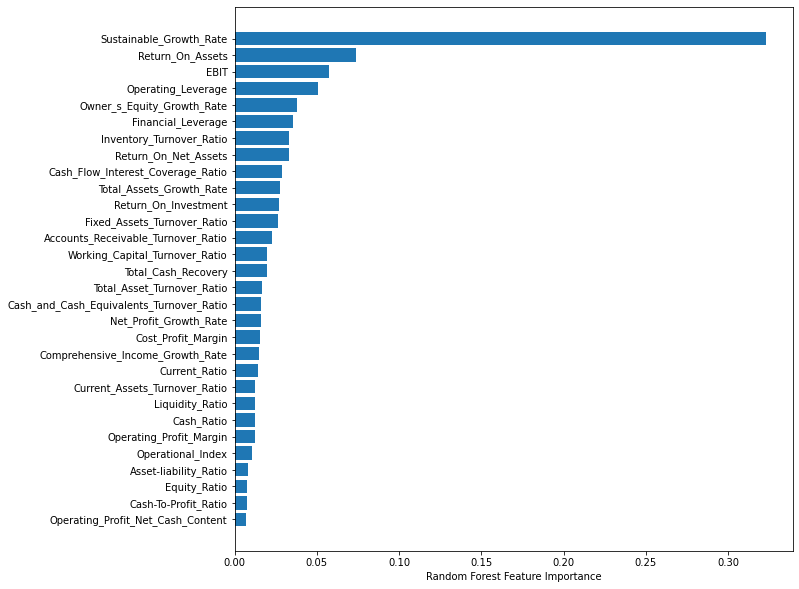

In [21]:
plt.figure(figsize=(10,10))
plt.barh(FS.iloc[:,1],FS.iloc[:,2])
plt.xlabel("Random Forest Feature Importance")
plt.savefig("rf_importance.png")

LSTM

In [24]:
x_sel = x_std[:, FS["rank"] <= 20]
x_train, x_test, y_train, y_test = train_test_split(x_std,y_std,test_size=0.25)

In [ ]:
# 定义神经网络模型中的eaylu stop 如果测试集误差连续patienc次不再下降 则返回测试集对应的最佳模型 restore_best_weights 返回最佳
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
# 定义lstm模型
model = tf.keras.Sequential([
    # 变成n*1序列
    tf.keras.layers.Reshape((x_train_pca.shape[1], 1), input_shape=(x_train_pca.shape[1],)),
    # lstm
    tf.keras.layers.LSTM(64, activation="relu", input_shape=(x_train_pca.shape[1], 1)),
    # dropout 增加泛化能力
    tf.keras.layers.Dropout(0.2),
    # 输出层
    tf.keras.layers.Dense(1)
])
# optimizer 优化器 求解算法 比如sgd是梯度下降 这个是nadam是sgd的改进
# loss 损失函数
model.compile(optimizer='RMSProp', loss='mae')
# validation data 验证集
# epochs 迭代次数
# barch size 批次数量 每次更新模型参数的样本数量
# use_multiprocessing 多线程计算加快计算速度
history = model.fit(x_train_pca, y_train,
                    validation_data=(x_test_pca, y_test),
                    epochs=1000,
                    verbose=0, # 0不查看迭代过程 可取0 1 2
                    batch_size=32,
                    use_multiprocessing=True,
                    callbacks=[early_stopping])

In [26]:
y_tool.inverse_transform(model.predict(x_train))

array([[0.36229452],
       [0.35721815],
       [0.3589345 ],
       ...,
       [0.36503422],
       [0.36113325],
       [0.35347837]], dtype=float32)

In [38]:
tier25

0.080753

In [40]:
y_train

array([[ 0.47578888],
       [-0.32160211],
       [-0.34747287],
       ...,
       [-0.00657145],
       [-0.22236903],
       [-0.51310256]])

In [33]:
y_train_pre=y_tool.inverse_transform(model.predict(x_train))
for i in range(len(y_train_pre)):
    if (y_train_pre[i]<tier25):
        y_train_pre[i]=-1
    elif (y_train_pre[i]>tier75):
        y_train_pre[i]=1
    else:
        y_train_pre[i]=0
num=0
for i in range(len(y_train_pre)):
    if (y_train_pre[i]==y_train[i]):
        num=num+1
acc=num/len(y_train_pre)
print('acc=',acc)

acc= 0.6723803693500663


In [34]:
y_test_pre=y_tool.inverse_transform(model.predict(x_test))
for i in range(len(y_test_pre)):
    if (y_test_pre[i]<tier25):
        y_test_pre[i]=-1
    elif (y_test_pre[i]>tier75):
        y_test_pre[i]=1
    else:
        y_test_pre[i]=0
num=0
for i in range(len(y_test_pre)):
    if (y_test_pre[i]==y_test[i]):
        num=num+1
acc=num/len(y_test_pre)
print('acc=',acc)

acc= 0.6408569242540169


Transform label to int

In [33]:
data2 = data3.sort_values(by=['Future_EPS'])
data2=data2.reset_index(drop=True)
tier25=data2.iloc[6534,-1]
tier75=data2.iloc[19603,-1]
data2['Classified']=0
for i in range(0,6534):
  data2.iloc[i,-1]=-1
for i in range (19603,26137):
  data2.iloc[i,-1]=1
data4 = data2.sort_values(by=['Stkcd','Accper'])
data4=data4.drop(columns=['Future_EPS'])
data4=data4.reset_index(drop=True)
feature_global=data4.iloc[:,2:-1]
response_global=data4.iloc[:,-1]
response_global=response_global.values.reshape(-1,1)
X_tool = StandardScaler()
x_std = X_tool.fit_transform(feature_global)
y_std = response_global
x_train,x_test,y_train,y_test = train_test_split(x_std,y_std,test_size=0.25)

In [34]:
data4

,Stkcd,Accper,Current_Ratio,Liquidity_Ratio,Cash_Ratio,Cash_Flow_Interest_Coverage_Ratio,Asset-liability_Ratio,Equity_Ratio,Total_Assets_Growth_Rate,Net_Profit_Growth_Rate,...,Total_Cash_Recovery,Operational_Index,Return_On_Assets,Return_On_Net_Assets,EBIT,Operating_Profit_Margin,Cost_Profit_Margin,Cash-To-Profit_Ratio,Return_On_Investment,Classified
0,0055.HK,2019-03-31,1.042785,0.577486,0.163058,19.986092,0.270758,0.371286,-0.005702,0.100264,...,0.013945,1.004190,0.021926,0.020527,1.380945e+08,0.071808,0.079216,0.656901,0.004662,0
1,0055.HK,2019-09-30,1.028640,0.607188,0.197985,365.451594,0.269749,0.369392,0.019587,0.243492,...,0.087101,2.883482,0.055420,0.053246,3.517456e+08,0.069937,0.085160,1.590517,0.014966,0
2,0055.HK,2019-12-31,1.018991,0.630694,0.171091,204.414341,0.278266,0.385551,0.047187,0.379693,...,0.109908,1.407305,0.073880,0.072159,4.763158e+08,0.071424,0.085806,1.533349,0.020098,-1
3,0055.HK,2020-03-31,1.035491,0.623834,0.177662,-68.529810,0.269218,0.368398,0.039166,-0.762738,...,-0.032341,-28.797704,0.005578,0.004640,3.665077e+07,0.051783,0.074622,-6.306631,0.012596,-1
4,0055.HK,2020-06-30,1.022618,0.584835,0.154379,6.187099,0.257824,0.347390,0.026595,-0.402941,...,0.005526,0.181759,0.022913,0.023732,1.482274e+08,0.104064,0.151667,0.245828,0.019409,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,ZZ-B.ST,2017-12-31,1.252963,0.967910,0.217087,-6.218580,0.636977,1.754648,0.391041,-0.524148,...,-0.044966,-5.846178,0.024385,0.026696,1.318273e+08,0.041494,0.048548,-3.275803,0.156993,-1
26133,ZZ-B.ST,2018-06-30,1.369232,0.936780,0.326114,2.875350,0.577800,1.368543,0.333473,0.312685,...,0.015172,0.762842,0.031812,0.054694,2.142928e+08,0.164012,0.206903,0.617738,0.042299,0
26134,ZZ-B.ST,2018-09-30,1.425613,0.955237,0.354545,-0.779157,0.590018,1.439129,0.393759,0.371169,...,-0.006480,-0.243447,0.045464,0.076671,3.175173e+08,0.168826,0.215357,-0.196121,0.042299,0
26135,ZZ-B.ST,2018-12-31,1.069262,0.834902,0.094393,1.851293,0.663207,1.969187,0.157210,2.354460,...,0.026388,1.544324,0.051099,0.085100,3.466858e+08,0.079311,0.149121,0.790663,0.042299,-1


PCA

In [35]:
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=0.85)
#='mle'

In [37]:
x_std_pca = pca.fit_transform(x_std)
x_train_pca,x_test_pca,y_train,y_test = train_test_split(x_std_pca,y_std,test_size=0.2)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

In [38]:
np.shape(x_train_pca)

(20909, 17)

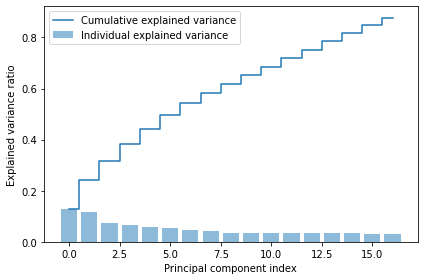

<Figure size 432x288 with 0 Axes>

In [39]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig("pca_importance.png")

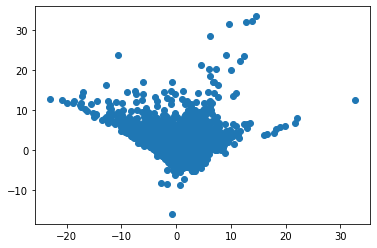

<Figure size 432x288 with 0 Axes>

In [40]:
pca.fit(x_std)
# 输出特征值
#print(pca.explained_variance_)
# 输出特征向量
#print(pca.components_)
# 降维后的数据
x_new = pca.transform(x_std)
fig = plt.figure()
plt.scatter(x_new[:, 1],x_new[:, 0], marker='o')
plt.show()
plt.savefig("1vs2_pca.png")

In [44]:
from pandas.core.frame import DataFrame
import seaborn as sns

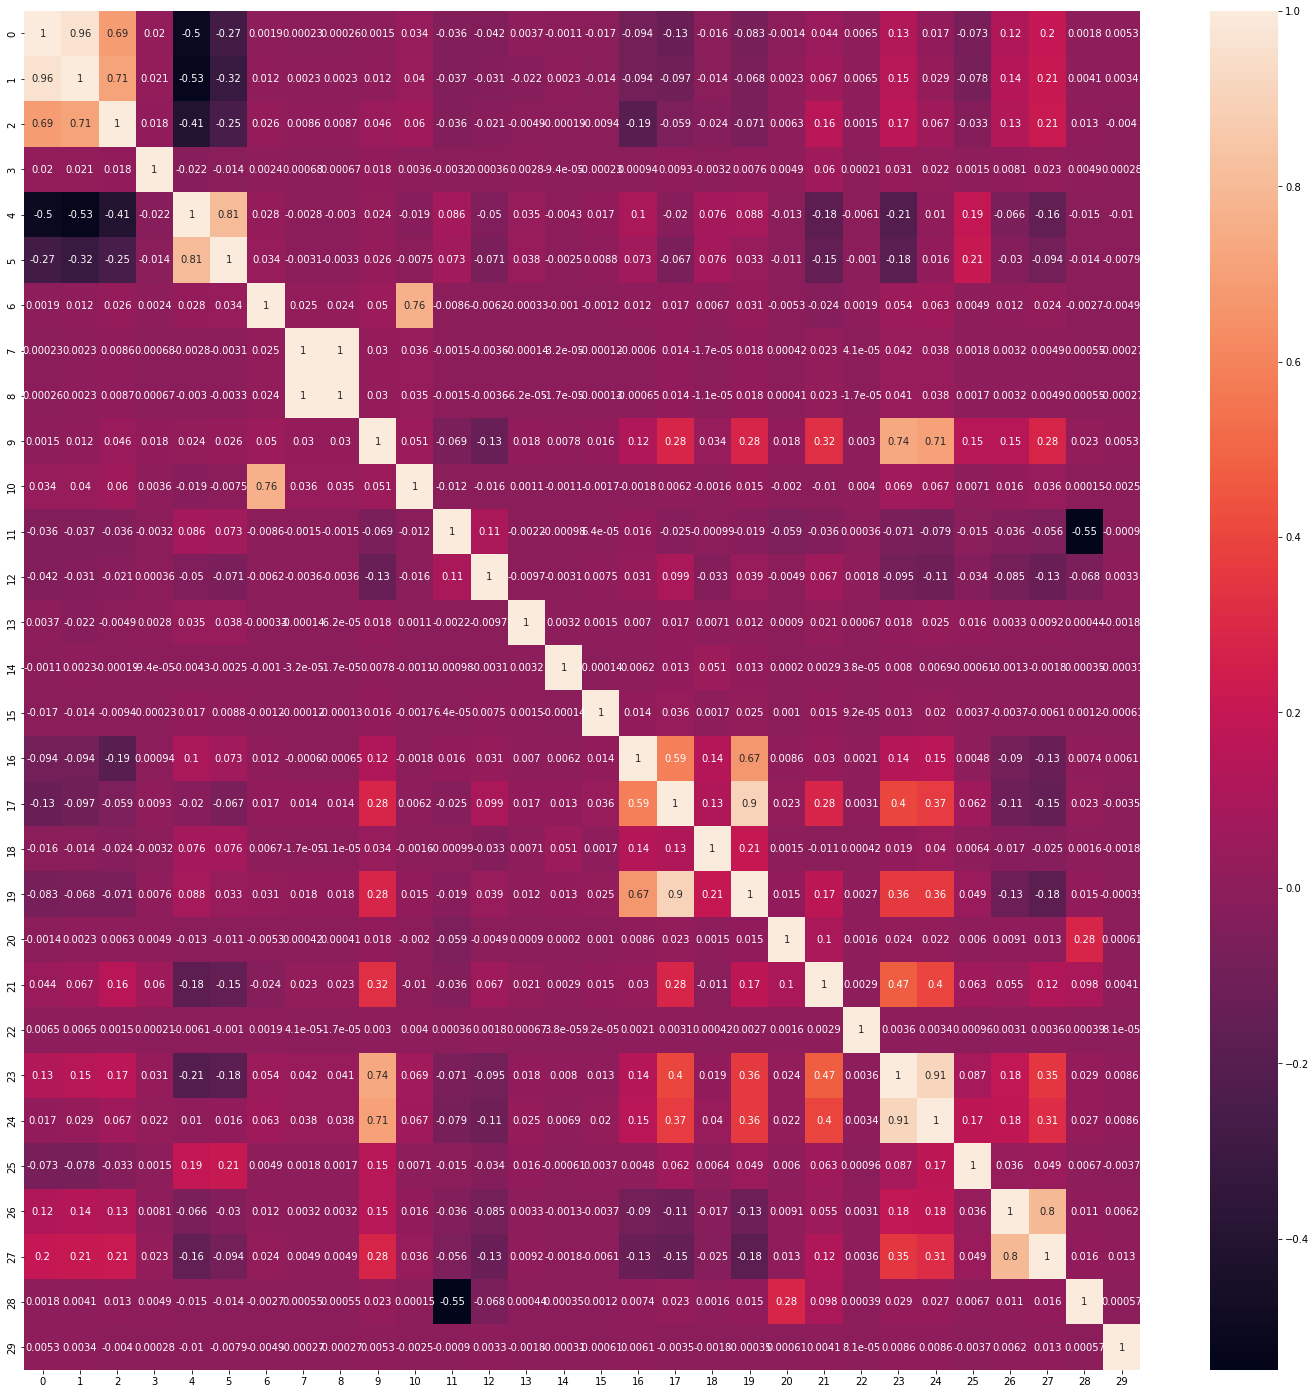

In [45]:
plt.figure(figsize=(25,25))
x = pd.DataFrame(x_std)
sns.heatmap(x.corr(), annot=True) 
plt.savefig("heat_corvariance.png")


SVM

In [24]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [25]:
model=OneVsRestClassifier(svm.SVC(kernel='poly',tol=10e-2,C=7.0))

In [26]:
#clt = model.fit(x_train_pca,y_train)
clt = model.fit(x_train,y_train)

In [31]:
#np.shape(x_test_pca)
np.shape(x_test)

(6535, 30)

In [32]:
#y_test_pred = clt.predict(x_test_pca)
y_test_pred = clt.predict(x_test)
ov_acc = metrics.accuracy_score(y_test_pred,y_test)
print("overall accuracy: %f"%(ov_acc))
print("===========================================")
acc_for_each_class = metrics.precision_score(y_test,y_test_pred,average=None)
print("acc_for_each_class:\n",acc_for_each_class)
print("===========================================")
avg_acc = np.mean(acc_for_each_class)
print("average accuracy:%f"%(avg_acc))

overall accuracy: 0.560367
acc_for_each_class:
 [0.74861878 0.53197111 0.74798387]
average accuracy:0.676191
